In [25]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("IPL_2024_Matches.csv")

# Show first few rows
df

,Date,Team1,Team2,Winner,Venue,Toss Winner,Toss Decision,Team1 Score,Team2 Score,Match Result
0,2024-03-22,CSK,GT,GT,Ahmedabad,GT,Bat,180/7,182/4,GT won by 6 wkts
1,2024-03-23,RCB,MI,RCB,Mumbai,MI,Field,175/5,160/9,RCB won by 15 runs
2,2024-03-24,MI,RR,RR,Jaipur,RR,Bat,150/6,151/4,RR won by 6 wkts
3,2024-03-25,GT,DC,GT,Delhi,GT,Bat,190/8,185/9,GT won by 5 runs
4,2024-03-26,KKR,SRH,KKR,Kolkata,KKR,Field,165/7,162/9,KKR won by 3 runs


In [7]:
# Shape of the dataset
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Column names
print("Columns:", df.columns.tolist())

# Data types
df.info()

Rows: 5, Columns: 10
Columns: ['Date', 'Team1', 'Team2', 'Winner', 'Venue', 'Toss Winner', 'Toss Decision', 'Team1 Score', 'Team2 Score', 'Match Result']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           5 non-null      object
 1   Team1          5 non-null      object
 2   Team2          5 non-null      object
 3   Winner         5 non-null      object
 4   Venue          5 non-null      object
 5   Toss Winner    5 non-null      object
 6   Toss Decision  5 non-null      object
 7   Team1 Score    5 non-null      object
 8   Team2 Score    5 non-null      object
 9   Match Result   5 non-null      object
dtypes: object(10)
memory usage: 532.0+ bytes


Here in the above output, we have checked the over all info of the columns of the dataset.
From this, we can know the below info.
1. How many columns are present in the dataset.
2. Type of the column.
3. If the column has null values or not and if yes, how many null it has.
4. How much memory this dataset is using.

It shows in a very organised way.

In [8]:
## Basic Stats

# Count number of matches played
print("Total Matches:", len(df))

# Number of unique teams
teams = pd.unique(df[['Team1', 'Team2']].values.ravel('K'))
print("Teams:", teams)

# Most frequently used venue
print("Most Played Venue:", df['Venue'].mode()[0])

Total Matches: 5
Teams: ['CSK' 'RCB' 'MI' 'GT' 'KKR' 'RR' 'DC' 'SRH']
Most Played Venue: Ahmedabad


Team-wise Wins:
 Winner
GT     2
RCB    1
RR     1
KKR    1
Name: count, dtype: int64


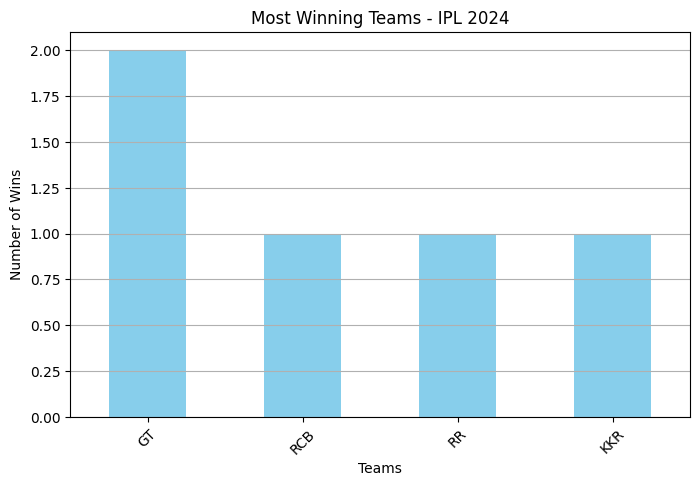

In [10]:
# Finding th emost winning team

# Count number of wins per team
wins = df['Winner'].value_counts()

# Display
print("Team-wise Wins:\n", wins)

# Plotting

plt.figure(figsize=(8,5))
wins.plot(kind='bar', color='skyblue')
plt.title("Most Winning Teams - IPL 2024")
plt.ylabel("Number of Wins")
plt.xlabel("Teams")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Toss winner also won the match in 4 out of 5 matches (80.00%)


C:\Users\hpriy\AppData\Local\Temp\ipykernel_26328\2778686031.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Toss_Match_Same', palette='Set2', legend = False)


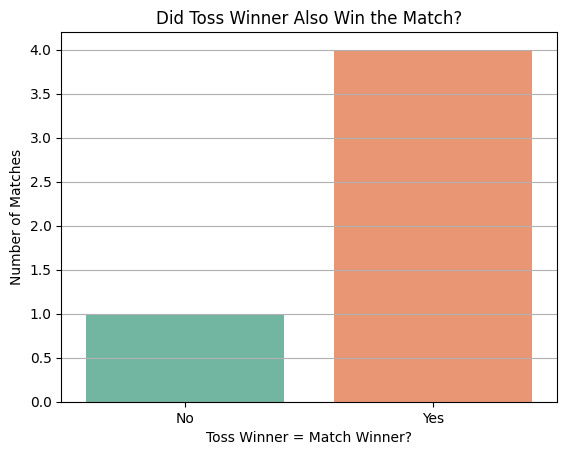

In [14]:
# Finding if winning the toss helps in winning the match or not.

# Create a new column: Toss Winner == Match Winner
df['Toss_Match_Same'] = df['Toss Winner'] == df['Winner']

# Count how many times toss winner also won the match
same_wins = df['Toss_Match_Same'].sum()
total_matches = len(df)

print(f"Toss winner also won the match in {same_wins} out of {total_matches} matches ({(same_wins/total_matches)*100:.2f}%)")

# Plot
import seaborn as sns

sns.countplot(data=df, x='Toss_Match_Same', palette='Set2', legend = False)
plt.title("Did Toss Winner Also Win the Match?")
plt.xlabel("Toss Winner = Match Winner?")
plt.ylabel("Number of Matches")
plt.xticks([0,1], ['No', 'Yes'])
plt.grid(axis='y')
plt.show()

Matches per Venue:
 Venue
Ahmedabad    1
Mumbai       1
Jaipur       1
Delhi        1
Kolkata      1
Name: count, dtype: int64


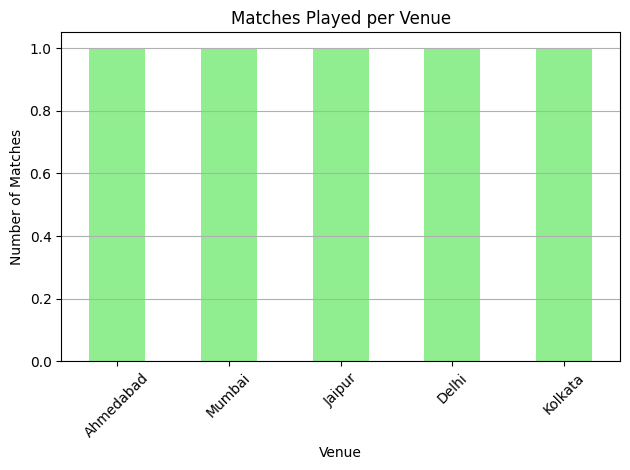

In [22]:
# Showing where the most of the matches happened.

venue_counts = df['Venue'].value_counts()

# Display and plot
print("Matches per Venue:\n", venue_counts)

venue_counts.plot(kind='bar', color='lightgreen')
plt.title("Matches Played per Venue")
plt.ylabel("Number of Matches")
plt.xlabel("Venue")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Identifying Nail-Biter matches

# Function to check close match
def is_close_match(result):
    if 'won by' in result:
        if 'wkt' in result or 'wickets' in result:
            num = int(result.split('won by ')[1].split(' ')[0])
            return num <= 2
        elif 'run' in result or 'runs' in result:
            num = int(result.split('won by ')[1].split(' ')[0])
            return num <= 10
    return False

# Apply
df['Close_Match'] = df['Match Result'].apply(is_close_match)

# Filter and display
close_matches = df[df['Close_Match']]
print("Close Matches:\n", close_matches[['Date', 'Team1', 'Team2', 'Match Result']])

Close Matches:
          Date Team1 Team2       Match Result
3  2024-03-25    GT    DC   GT won by 5 runs
4  2024-03-26   KKR   SRH  KKR won by 3 runs
